## Time evolution of the variables 

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from glob import glob
import itertools
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

### Load data

In [2]:
# paths
path_models = '/scratch/usr/shkifmmp/reccap2/'
mask_reccap_SO = xr.open_dataset('/scratch/usr/shkifmmp/reccap2/mask/reccap_regions_SOsubs.nc').SO_basins_biomes

In [3]:
# CESM-ETHZ

CESM_ETHZ = xr.open_mfdataset(glob(path_models + 'CESM-ETHZ/' + '*A*.nc'))

path_m_CESM_ETHZ = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/CESM-ETHZ/'
mask_CESM_ETHZ = xr.open_dataset(glob(path_m_CESM_ETHZ + 'ancillary*.nc')[0]).mask_sfc
area_CESM_ETHZ = xr.open_dataset(glob(path_m_CESM_ETHZ + 'ancillary*.nc')[0]).area

CESM_ETHZ = CESM_ETHZ.rename({'time_mon': 'time'})

In [4]:
CESM_ETHZ['talkos'] = CESM_ETHZ.talkos * 1020 *1e-6

In [5]:
# FESOM_REcoM_HR

FESOM_REcoM_HR = xr.open_mfdataset(glob(path_models + 'FESOM_REcoM_HR/' + '*A*v20210712.nc'))

path_m_FESOM_REcoM_HR = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/FESOM_REcoM_HR/'
mask_FESOM_REcoM_HR = xr.open_dataset(glob(path_m_FESOM_REcoM_HR + 'mask_sfc*.nc')[0]).mask_sfc
area_FESOM_REcoM_HR = xr.open_dataset(glob(path_m_FESOM_REcoM_HR + 'area*.nc')[0]).area

FESOM_REcoM_HR = FESOM_REcoM_HR.rename({'Lat': 'lat', 'Lon': 'lon', 'Time': 'time'})
area_FESOM_REcoM_HR = area_FESOM_REcoM_HR.rename({'Lat': 'lat', 'Lon': 'lon'})
mask_FESOM_REcoM_HR = mask_FESOM_REcoM_HR.rename({'Lat': 'lat', 'Lon': 'lon'})

In [6]:
# FESOM_REcoM_LR

FESOM_REcoM_LR = xr.open_mfdataset(glob(path_models + 'FESOM_REcoM_LR/' + '*A*.nc'))

path_m_FESOM_REcoM_LR = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/FESOM_REcoM_LR/'
mask_FESOM_REcoM_LR = xr.open_dataset(glob(path_m_FESOM_REcoM_LR + 'mask_sfc*.nc')[0]).mask_sfc
area_FESOM_REcoM_LR = xr.open_dataset(glob(path_m_FESOM_REcoM_LR + 'area*.nc')[0]).area

FESOM_REcoM_LR = FESOM_REcoM_LR.rename({'Lat': 'lat', 'Lon': 'lon', 'Time': 'time'})
area_FESOM_REcoM_LR = area_FESOM_REcoM_LR.rename({'Lat': 'lat', 'Lon': 'lon'})
mask_FESOM_REcoM_LR = mask_FESOM_REcoM_LR.rename({'Lat': 'lat', 'Lon': 'lon'})

In [7]:
# MOM6-COBALT2-Princeton

MOM6_COBALT2_Princeton = xr.open_mfdataset(glob(path_models + 'MOM6-COBALT2-Princeton/' + '*A*.nc'))

path_m_MOM6_COBALT2_Princeton = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/MOM6-COBALT2-Princeton/'
mask_MOM6_COBALT2_Princeton = xr.open_dataset(glob(path_m_MOM6_COBALT2_Princeton + 'ancillary_data_grid*.nc')[0]).mask_sfc
area_MOM6_COBALT2_Princeton = xr.open_dataset(glob(path_m_MOM6_COBALT2_Princeton + 'ancillary_data_grid*')[0]).area

In [8]:
#MRI_ESM2_0

MRI_ESM2_0 = xr.open_mfdataset(glob(path_models + 'MRI-ESM2-0/' + '*A*.nc'))

path_m_MRI_ESM2_0 = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/MRI-ESM2-0/'
mask_MRI_ESM2_0 = xr.open_dataset(glob(path_m_MRI_ESM2_0 + 'mask_sfc*.nc')[0]).mask_sfc
area_MRI_ESM2_0 = xr.open_dataset(glob(path_m_MRI_ESM2_0 + 'area_MRI*.nc')[0]).area

MRI_ESM2_0 = MRI_ESM2_0.drop(['time_bnds', 'lat_bnds', 'lon_bnds'])
MRI_ESM2_0 = MRI_ESM2_0.reset_coords(['type', 'depth'], drop=True)

In [9]:
# NorESM-OC1.2

NorESM_OC1_2 = xr.open_mfdataset(glob(path_models + 'NorESM-OC1.2/' + '*A*.nc'))

path_m_NorESM_OC1_2 = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/NorESM-OC1.2/'
mask_NorESM_OC1_2 = xr.open_dataset(glob(path_m_NorESM_OC1_2 + 'mask_sfc*A*.nc')[0]).mask_sfc
area_NorESM_OC1_2 = xr.open_dataset(glob(path_m_NorESM_OC1_2 + 'area_*A*.nc')[0]).area 

NorESM_OC1_2 = NorESM_OC1_2.drop_dims(['bnds'])
NorESM_OC1_2.coords['time'] = NorESM_OC1_2.indexes['time'].to_datetimeindex()

In [10]:
# ORCA025-GEOMAR

ORCA025_GEOMAR = xr.open_mfdataset(glob(path_models + 'ORCA025-GEOMAR/' + '*A*.nc'))

path_m_ORCA025_GEOMAR = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/ORCA025-GEOMAR/'
mask_ORCA025_GEOMAR = xr.open_dataset(glob(path_m_ORCA025_GEOMAR + 'mask_sfc*.nc')[0]).mask_sfc
area_ORCA025_GEOMAR = xr.open_dataset(glob(path_m_ORCA025_GEOMAR + 'area_ORCA*.nc')[0]).area

In [11]:
# EC-Earth3

EC_Earth3 = xr.open_mfdataset(glob(path_models + 'EC-Earth3/' + '*A*.nc'))

path_m_EC_Earth3 = '/scratch/usr/shklvn09/SDIR/RECCAP-2/model_intercomparison/EC-Earth3/'
mask_EC_Earth3 = xr.open_dataset(glob(path_m_EC_Earth3 + 'mask_sfc*.nc')[0]).mask_sfc.squeeze()
area_EC_Earth3 = xr.open_dataset(glob(path_m_EC_Earth3 + 'area_EC*.nc')[0]).cell_area

EC_Earth3 = EC_Earth3.drop_dims(['bnds'])
EC_Earth3.coords['time'] = EC_Earth3.indexes['time'].to_datetimeindex()
EC_Earth3 = EC_Earth3.reset_coords(['depth'], drop=True)
EC_Earth3 = EC_Earth3.rename({'mlotst': 'mld'})
mask_EC_Earth3 = mask_EC_Earth3.reset_coords(['time', 'lev'], drop= True)

### Correcting mask_reccap -- using Cara's mask

In [12]:
mask_SO = mask_reccap_SO.sel(lon=slice(0,180)) 

mask_SO_aux = mask_reccap_SO.sel(lon=slice(-180,0))

mask_SO_aux['lon'] = mask_SO_aux.lon + 360

mask_SO = xr.concat(objs = [mask_SO, mask_SO_aux], dim = 'lon')

### Computing weighted mean

In [13]:
def weighted_mean(variable, weight, mask):
    return (variable.where(mask) * weight.where(mask)).sum(('lat','lon')) / weight.sum(('lat', 'lon'))

In [28]:
#dictionary for the models
models = {'CESM_ETHZ': CESM_ETHZ, 'FESOM_REcoM_HR': FESOM_REcoM_HR, 'FESOM_REcoM_LR': FESOM_REcoM_LR, 'MOM6_COBALT2_Princeton': MOM6_COBALT2_Princeton,
         'MRI_ESM2_0': MRI_ESM2_0, 'NorESM_OC1_2': NorESM_OC1_2, 
         'ORCA025_GEOMAR': ORCA025_GEOMAR, 'EC_Earth3': EC_Earth3}

In [15]:
# making all models to have same time coordinates, otherwise it cannot compute mean properly
for m in models:
    models[m].coords['time'] = CESM_ETHZ.coords['time']

### Rerun the models dictionary before continuing

In [19]:
# First year of Fesom has no data
FESOM_REcoM_HR = FESOM_REcoM_HR.isel(time = slice(12,None))

### Rerun the models dictionary before continuing

In [21]:
# calculating annual mean
for m in models:
    mod = models[m]
    globals()[m] = mod.groupby("time.year").mean().rename()

In [23]:
for m in models:
    mod = models[m]
    globals()[m] = mod.rename({'year': 'time'})

In [26]:
# weight mean of all models for all variables in the different basins and biomes
suffix = ['_atl_STSS', '_atl_SPSS', '_atl_ICE', '_ind_STSS', '_ind_SPSS', '_ind_ICE', '_pac_STSS', '_pac_SPSS', '_pac_ICE']

for m, i in itertools.product(models, np.arange(0,9)):        #nested loop; globals() get the variables with the specified string_name or create if not existent
    mod = models[m]
    globals()[m + suffix[i]] = weighted_mean(mod.where(mask_SO == i), 
                               globals()['area_' + m].where(mask_SO == i), 
                               globals()['mask_' + m].where(mask_SO == i))

In [27]:
# create varibles by variables name, instead of by models name in order to do mean, std and plots

pref = [*CESM_ETHZ.keys()]
for i, j in itertools.product(np.arange(0,9), pref):
    
    #FESOMs do not have po4os; EC_Earth does not have fice
    if j == 'po4os':
        globals()[j + suffix[i]] = xr.Dataset(data_vars = dict(CESM_ETHZ = globals()[[*models][0] + suffix[i]][j],
                                                       EC_Earth3 = globals()[[*models][7] + suffix[i]][j],
                                                       MOM6_COBALT2_Princeton = globals()[[*models][3] + suffix[i]][j],
                                                       ORCA025_GEOMAR = globals()[[*models][6] + suffix[i]][j],
#                                                        ECCO_Darwin = globals()[[*models][4] + suffix[i]][j],
                                                       MRI_ESM2_0 = globals()[[*models][4] + suffix[i]][j],
                                                       NorESM_OC1_2 = globals()[[*models][5] + suffix[i]][j]))
    elif j == 'fice':
        globals()[j + suffix[i]] = xr.Dataset(data_vars = dict(CESM_ETHZ = globals()[[*models][0] + suffix[i]][j],
                                                       FESOM_REcoM_HR = globals()[[*models][1] + suffix[i]][j],
                                                       FESOM_REcoM_LR = globals()[[*models][2] + suffix[i]][j],
                                                       MOM6_COBALT2_Princeton = globals()[[*models][3] + suffix[i]][j],
                                                       ORCA025_GEOMAR = globals()[[*models][6] + suffix[i]][j],
#                                                        ECCO_Darwin = globals()[[*models][4] + suffix[i]][j],
                                                       MRI_ESM2_0 = globals()[[*models][4] + suffix[i]][j],
                                                       NorESM_OC1_2 = globals()[[*models][5] + suffix[i]][j]))
    else:
        globals()[j + suffix[i]] = xr.Dataset(data_vars = dict(CESM_ETHZ = globals()[[*models][0] + suffix[i]][j],
                                                       FESOM_REcoM_HR = globals()[[*models][1] + suffix[i]][j],
                                                       FESOM_REcoM_LR = globals()[[*models][2] + suffix[i]][j],
                                                       EC_Earth3 = globals()[[*models][7] + suffix[i]][j],
                                                       MOM6_COBALT2_Princeton = globals()[[*models][3] + suffix[i]][j],
                                                       ORCA025_GEOMAR = globals()[[*models][6] + suffix[i]][j],
#                                                        ECCO_Darwin = globals()[[*models][4] + suffix[i]][j],
                                                       MRI_ESM2_0 = globals()[[*models][4] + suffix[i]][j],
                                                       NorESM_OC1_2 = globals()[[*models][5] + suffix[i]][j]))

In [29]:
# getting mean and std of variables
for i, j in itertools.product(np.arange(0,9), pref):
    var_aux = globals()[j + suffix[i]]
    mean_v = var_aux.to_array(dim='new').mean('new', skipna = True) #it creates a relationship between the different variables by new dimension and do the mean in that dim
    std_v = var_aux.to_array(dim='new').std('new', skipna = True) #for standard deviation
    globals()[j + suffix[i]] = var_aux.assign(mod_mean = mean_v, mod_std = std_v) # adding variables to DataSet

### Plotting

In [30]:
def plot_timeseries(prefix):
    "Function for plotting          "
    "prefix = variable to be plotted"
    pref = prefix
    models_plot = models.copy()
    axis_lim = np.zeros((3,3))
    axis_lim_min = np.zeros((3,3))
    #to remove from models list if the models does not have the specific variable
    if pref == 'po4os':
        rem_list = ['FESOM_REcoM_LR', 'FESOM_REcoM_HR']
        [models_plot.pop(key, None) for key in rem_list]
    if pref == 'fice':
        models_plot.pop('EC_Earth3', None)
        
    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (24,15))    
    
    for j in np.arange(0,3):
        dic_atl = globals()[pref + suffix[j]]
        dic_ind = globals()[pref + suffix[j+3]]
        dic_pac = globals()[pref + suffix[j+6]]

    # Atl
    
        for m in models_plot:
            dic_atl[m].plot(ax=axs[j,0], linewidth = 1.5)
        dic_atl.mod_mean.plot(ax=axs[j,0], color = 'k', linewidth = 3.5)
#         axs[j,0].fill_between(dic_atl.time.values, dic_atl.mod_mean - dic_atl.mod_std, 
#                          dic_atl.mod_mean + dic_atl.mod_std, alpha = 0.1, color ='tab:gray')
        axs[j,0].set_xlabel(None)
        axs[j,0].margins(x=0)
        axis_lim_min[j,0] = axs[j,0].get_ylim()[0]
        axis_lim[j,0] = axs[j,0].get_ylim()[1]
        
        
        # y_labels
        if prefix == 'dissicos':
            axs[j,0].set_ylabel('DISSICOS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'fice':
            axs[j,0].set_ylabel('FICE', fontsize = 15)
        if prefix == 'spco2':
            axs[j,0].set_ylabel('SPCO2 ($\mu$atm)', fontsize = 15)
        if prefix == 'tos':
            axs[j,0].set_ylabel('TOS ($^{\circ}$C)', fontsize = 15)
        if prefix == 'sos':
            axs[j,0].set_ylabel('SOS', fontsize = 15)
        if prefix == 'no3os':
            axs[j,0].set_ylabel('NO3OS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'po4os':
            axs[j,0].set_ylabel('PO4OS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'mld':
            axs[j,0].set_ylabel('MLD (m)', fontsize = 15)
        if prefix == 'talkos':
            axs[j,0].set_ylabel('TALKOS (mol m$^{-3}$)', fontsize = 15)

    # Ind
        for m in models_plot:
            dic_ind[m].plot(ax=axs[j,1], linewidth = 1.5)
        dic_ind.mod_mean.plot(ax=axs[j,1], color = 'k', linewidth = 3.5)
#         axs[j,1].fill_between(dic_ind.time.values, dic_ind.mod_mean - dic_ind.mod_std, 
#                          dic_ind.mod_mean + dic_ind.mod_std, alpha = 0.1, color ='tab:gray')
        axs[j,1].set_ylabel(None)
        axs[j,1].set_xlabel(None)
        axs[j,1].margins(x=0)
        axis_lim_min[j,1] = axs[j,1].get_ylim()[0]
        axis_lim[j,1] = axs[j,1].get_ylim()[1]

    # Pac
        for m in models_plot:
            dic_pac[m].plot(ax=axs[j,2], linewidth = 1.5, label = m)
        dic_pac.mod_mean.plot(ax=axs[j,2], color = 'k', linewidth = 3.5, label = 'Mean')
#         axs[j,2].fill_between(dic_pac.time.values, dic_pac.mod_mean - dic_pac.mod_std, 
#                          dic_pac.mod_mean + dic_pac.mod_std, alpha = 0.1, color ='tab:gray')
        axs[j,2].set_ylabel(None)
        axs[j,2].set_xlabel(None)
        axs[j,2].margins(x=0)
        axis_lim_min[j,2] = axs[j,2].get_ylim()[0]
        axis_lim[j,2] = axs[j,2].get_ylim()[1]

        
    # adding text to the plot
    axs[0,0].text(0.01, 0.03,'STSS-Atl', color='k', transform=axs[0,0].transAxes, fontsize = 16)
    axs[1,0].text(0.01, 0.03,'SPSS-Atl', color='k', transform=axs[1,0].transAxes, fontsize = 16)
    axs[2,0].text(0.01, 0.03,'ICE-Atl', color='k', transform=axs[2,0].transAxes, fontsize = 16)
    
    axs[0,1].text(0.01, 0.03,'STSS-Ind', color='k', transform=axs[0,1].transAxes, fontsize = 16)
    axs[1,1].text(0.01, 0.03,'SPSS-Ind', color='k', transform=axs[1,1].transAxes, fontsize = 16)
    axs[2,1].text(0.01, 0.03,'ICE-Ind', color='k', transform=axs[2,1].transAxes, fontsize = 16)
        
    axs[0,2].text(0.01, 0.03,'STSS-Pac', color='k', transform=axs[0,2].transAxes, fontsize = 16)
    axs[1,2].text(0.01, 0.03,'SPSS-Pac', color='k', transform=axs[1,2].transAxes, fontsize = 16)
    axs[2,2].text(0.01, 0.03,'ICE-Pac', color='k', transform=axs[2,2].transAxes, fontsize = 16)  
    
    #ticks parameters
    for i in np.arange(0,3):
        axs[0,i].set_ylim(bottom = axis_lim_min[0,:].min(), top = axis_lim[0,:].max())
        axs[1,i].set_ylim(bottom = axis_lim_min[1,:].min(), top = axis_lim[1,:].max())
        
        if pref == 'mld':
            axs[2,i].set_ylim(bottom = axis_lim_min[2,:].min(), top = 800)
        else:
            axs[2,i].set_ylim(bottom = axis_lim_min[2,:].min(), top = axis_lim[2,:].max())
#         axs[0,i].set_xticks(ticks)
#         axs[0,i].xaxis.set_ticklabels([])
#         axs[1,i].set_xticks(ticks)
#         axs[1,i].xaxis.set_ticklabels([])
#         axs[2,i].xaxis.set_tick_params(rotation=0, labelsize = 15)
#         axs[2,i].set_xticks(ticks)
#         axs[2,i].xaxis.set_major_locator(mdates.DayLocator(bymonthday = [16,15]))
#         axs[2,i].xaxis.set_major_formatter(mticker.FuncFormatter(m_fmt))
    
    
    for ax in axs.flat:
        ax.yaxis.set_tick_params(labelsize = 13)
        ax.grid()
        ax.xaxis.set_tick_params(labelsize = 15)
#         ax.set_xticks(ticks)
#         ax.xaxis.set_major_formatter(mticker.FuncFormatter(m_fmt))
    
    #adding legend next to the plot
    leg = axs[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    
    for line in leg.get_lines():
        line.set_linewidth(2.7)
    
    savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
    plt.savefig(savepath + 'reccap2_' + pref + '_timeseries_1980_2018.png', format='png', facecolor="w",  bbox_inches='tight')

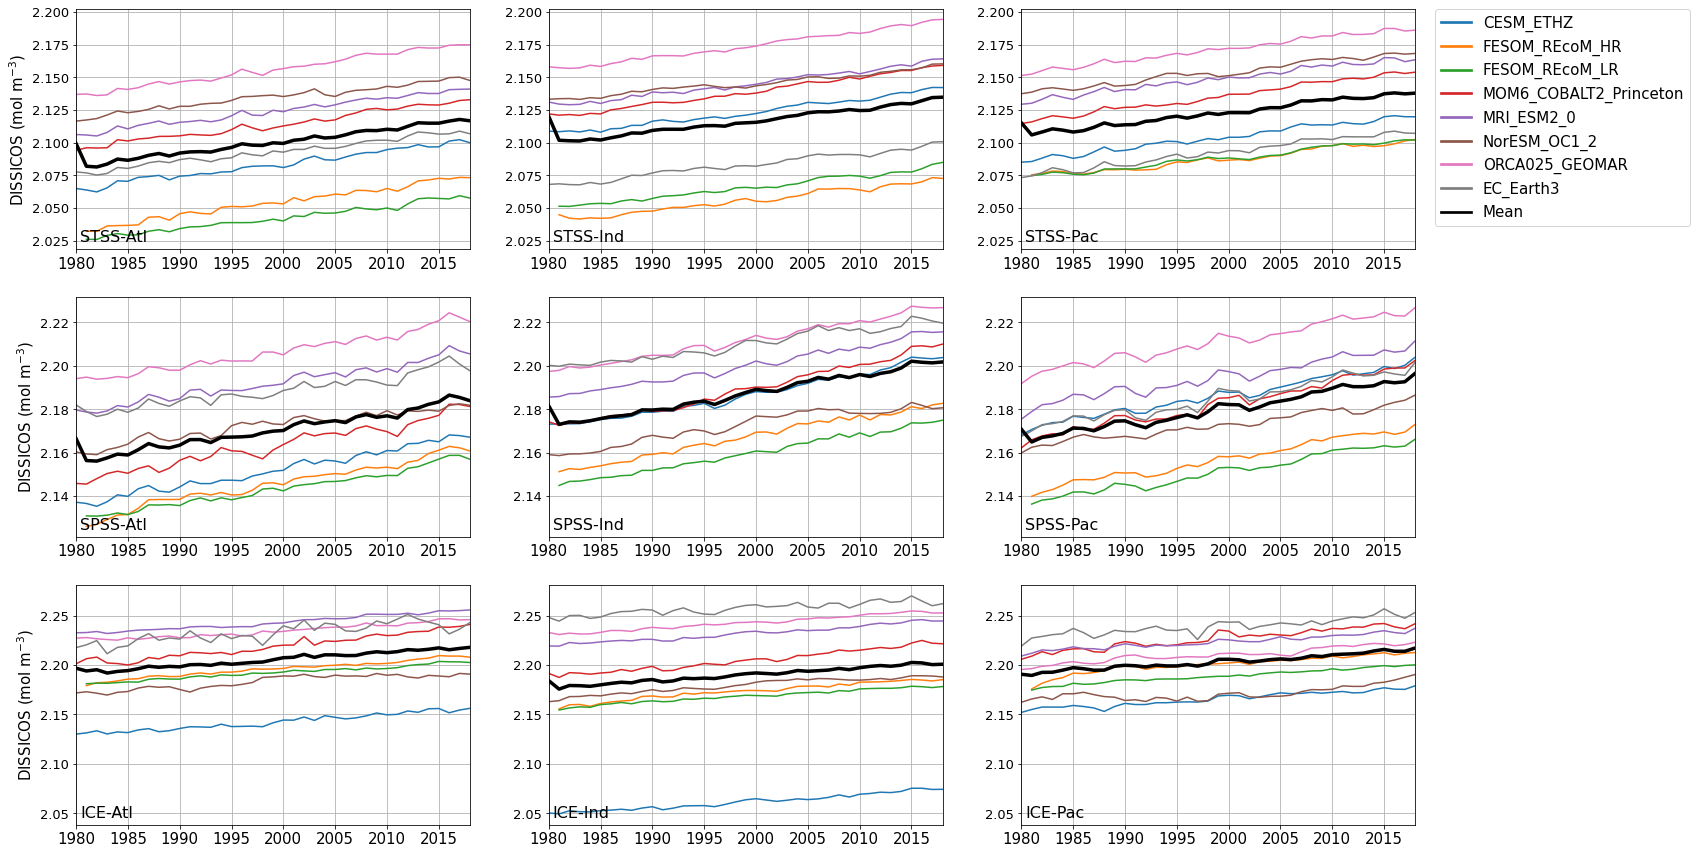

In [39]:
plot_timeseries('dissicos')

In [ ]:
[plot_timeseries(p) for p in pref]

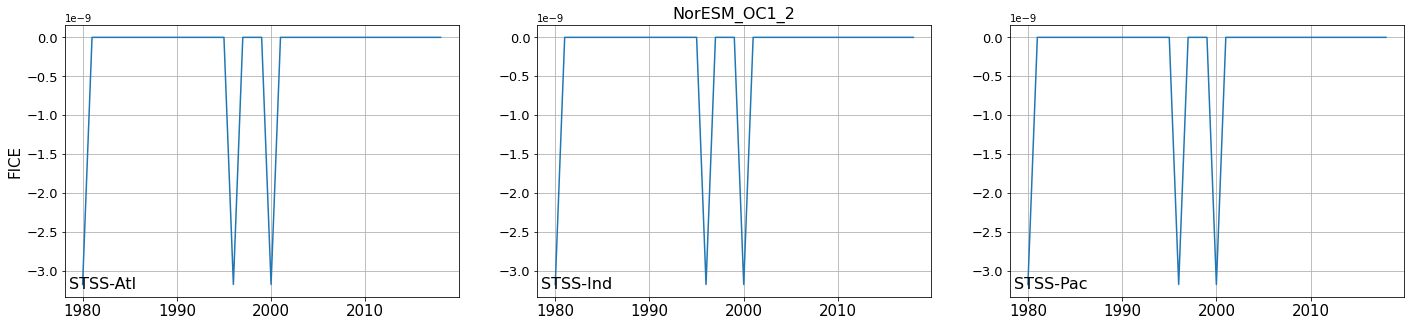

In [61]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (24,5))

fice_atl_STSS.NorESM_OC1_2.plot(ax= axs[0])
fice_ind_STSS.NorESM_OC1_2.plot(ax= axs[1])
fice_pac_STSS.NorESM_OC1_2.plot(ax= axs[2])

for ax in axs.flat:
    ax.grid()
    ax.yaxis.set_tick_params(labelsize = 13)
    ax.xaxis.set_tick_params(labelsize = 15)
    ax.set_xlabel(None)
    
axs[0].text(0.01, 0.03,'STSS-Atl', color='k', transform=axs[0].transAxes, fontsize = 16)
axs[1].text(0.01, 0.03,'STSS-Ind', color='k', transform=axs[1].transAxes, fontsize = 16)
axs[2].text(0.01, 0.03,'STSS-Pac', color='k', transform=axs[2].transAxes, fontsize = 16)
axs[0].set_ylabel('FICE', fontsize = 15)
axs[1].set_ylabel(None)
axs[2].set_ylabel(None)

axs[1].set_title('NorESM_OC1_2', fontsize=16)
# plt.tight_layout()

savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
plt.savefig(savepath + 'NorESM_OC1_2' + '_timeseries_1980_2018.png', format='png', facecolor="w",  bbox_inches='tight')

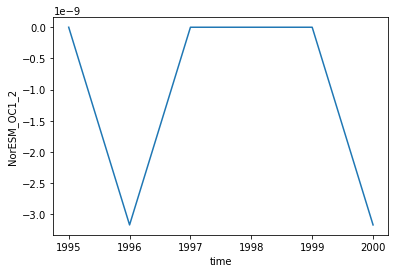

In [33]:
fice_atl_STSS.NorESM_OC1_2.sel(time=slice('1995','2000')).plot()

### Anomalies with respect to the annual mean for ALK and SSS

In [47]:
def plot_timeseries_anomalies(prefix):
    "Function for plotting the anomalies with respect to the annual mean"
    "prefix = variable to be plotted"
    pref = prefix
    models_plot = models.copy()
    axis_lim = np.zeros((3,3))
    axis_lim_min = np.zeros((3,3))
    #to remove from models list if the models does not have the specific variable
    if pref == 'po4os':
        rem_list = ['FESOM_REcoM_LR', 'FESOM_REcoM_HR']
        [models_plot.pop(key, None) for key in rem_list]
    if pref == 'fice':
        models_plot.pop('EC_Earth3', None)
        
    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (24,15))    
    
    for j in np.arange(0,3):
        dic_atl = globals()[pref + suffix[j]]
        dic_ind = globals()[pref + suffix[j+3]]
        dic_pac = globals()[pref + suffix[j+6]]

    # Atl
    
        for m in models_plot:
            (dic_atl[m] - dic_atl[m].mean('time')).plot(ax=axs[j,0], linewidth = 1.5)
        (dic_atl.mod_mean - dic_atl.mod_mean.mean('time')).plot(ax=axs[j,0], color = 'k', linewidth = 3.5)
#         axs[j,0].fill_between(dic_atl.time.values, dic_atl.mod_mean - dic_atl.mod_std, 
#                          dic_atl.mod_mean + dic_atl.mod_std, alpha = 0.1, color ='tab:gray')
        axs[j,0].set_xlabel(None)
        axs[j,0].margins(x=0)
        axis_lim_min[j,0] = axs[j,0].get_ylim()[0]
        axis_lim[j,0] = axs[j,0].get_ylim()[1]
        
        
        # y_labels
        if prefix == 'dissicos':
            axs[j,0].set_ylabel('DISSICOS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'fice':
            axs[j,0].set_ylabel('FICE', fontsize = 15)
        if prefix == 'spco2':
            axs[j,0].set_ylabel('SPCO2 ($\mu$atm)', fontsize = 15)
        if prefix == 'tos':
            axs[j,0].set_ylabel('TOS ($^{\circ}$C)', fontsize = 15)
        if prefix == 'sos':
            axs[j,0].set_ylabel('SOS', fontsize = 15)
        if prefix == 'no3os':
            axs[j,0].set_ylabel('NO3OS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'po4os':
            axs[j,0].set_ylabel('PO4OS (mol m$^{-3}$)', fontsize = 15)
        if prefix == 'mld':
            axs[j,0].set_ylabel('MLD (m)', fontsize = 15)
        if prefix == 'talkos':
            axs[j,0].set_ylabel('TALKOS (mol m$^{-3}$)', fontsize = 15)

    # Ind
        for m in models_plot:
            (dic_ind[m] - dic_ind[m].mean('time')).plot(ax=axs[j,1], linewidth = 1.5)
        (dic_ind.mod_mean - dic_ind.mod_mean.mean('time')).plot(ax=axs[j,1], color = 'k', linewidth = 3.5)
#         axs[j,1].fill_between(dic_ind.time.values, dic_ind.mod_mean - dic_ind.mod_std, 
#                          dic_ind.mod_mean + dic_ind.mod_std, alpha = 0.1, color ='tab:gray')
        axs[j,1].set_ylabel(None)
        axs[j,1].set_xlabel(None)
        axs[j,1].margins(x=0)
        axis_lim_min[j,1] = axs[j,1].get_ylim()[0]
        axis_lim[j,1] = axs[j,1].get_ylim()[1]

    # Pac
        for m in models_plot:
            (dic_pac[m] - dic_pac[m].mean('time')).plot(ax=axs[j,2], linewidth = 1.5, label = m)
        (dic_pac.mod_mean - dic_pac.mod_mean.mean('time')).plot(ax=axs[j,2], color = 'k', linewidth = 3.5, label = 'Mean')
#         axs[j,2].fill_between(dic_pac.time.values, dic_pac.mod_mean - dic_pac.mod_std, 
#                          dic_pac.mod_mean + dic_pac.mod_std, alpha = 0.1, color ='tab:gray')
        axs[j,2].set_ylabel(None)
        axs[j,2].set_xlabel(None)
        axs[j,2].margins(x=0)
        axis_lim_min[j,2] = axs[j,2].get_ylim()[0]
        axis_lim[j,2] = axs[j,2].get_ylim()[1]

        
    # adding text to the plot
    axs[0,0].text(0.01, 0.03,'STSS-Atl', color='k', transform=axs[0,0].transAxes, fontsize = 16)
    axs[1,0].text(0.01, 0.03,'SPSS-Atl', color='k', transform=axs[1,0].transAxes, fontsize = 16)
    axs[2,0].text(0.01, 0.03,'ICE-Atl', color='k', transform=axs[2,0].transAxes, fontsize = 16)
    
    axs[0,1].text(0.01, 0.03,'STSS-Ind', color='k', transform=axs[0,1].transAxes, fontsize = 16)
    axs[1,1].text(0.01, 0.03,'SPSS-Ind', color='k', transform=axs[1,1].transAxes, fontsize = 16)
    axs[2,1].text(0.01, 0.03,'ICE-Ind', color='k', transform=axs[2,1].transAxes, fontsize = 16)
        
    axs[0,2].text(0.01, 0.03,'STSS-Pac', color='k', transform=axs[0,2].transAxes, fontsize = 16)
    axs[1,2].text(0.01, 0.03,'SPSS-Pac', color='k', transform=axs[1,2].transAxes, fontsize = 16)
    axs[2,2].text(0.01, 0.03,'ICE-Pac', color='k', transform=axs[2,2].transAxes, fontsize = 16)  
    
    #ticks parameters
    for i in np.arange(0,3):
        axs[0,i].set_ylim(bottom = axis_lim_min[0,:].min(), top = axis_lim[0,:].max())
        axs[1,i].set_ylim(bottom = axis_lim_min[1,:].min(), top = axis_lim[1,:].max())
        
        if pref == 'mld':
            axs[2,i].set_ylim(bottom = axis_lim_min[2,:].min(), top = 800)
        else:
            axs[2,i].set_ylim(bottom = axis_lim_min[2,:].min(), top = axis_lim[2,:].max())
#         axs[0,i].set_xticks(ticks)
#         axs[0,i].xaxis.set_ticklabels([])
#         axs[1,i].set_xticks(ticks)
#         axs[1,i].xaxis.set_ticklabels([])
#         axs[2,i].xaxis.set_tick_params(rotation=0, labelsize = 15)
#         axs[2,i].set_xticks(ticks)
#         axs[2,i].xaxis.set_major_locator(mdates.DayLocator(bymonthday = [16,15]))
#         axs[2,i].xaxis.set_major_formatter(mticker.FuncFormatter(m_fmt))
    
    
    for ax in axs.flat:
        ax.yaxis.set_tick_params(labelsize = 13)
        ax.grid()
        ax.xaxis.set_tick_params(labelsize = 15)
#         ax.set_xticks(ticks)
#         ax.xaxis.set_major_formatter(mticker.FuncFormatter(m_fmt))
    
    #adding legend next to the plot
    leg = axs[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=15)
    
    for line in leg.get_lines():
        line.set_linewidth(2.7)
    
    savepath = '/home/shkifmmp/_WORK/notebooks/shared-notebooks/figures/'
    plt.savefig(savepath + 'reccap2_' + pref + '_timeseries_1980_2018_anom.png', format='png', facecolor="w",  bbox_inches='tight')

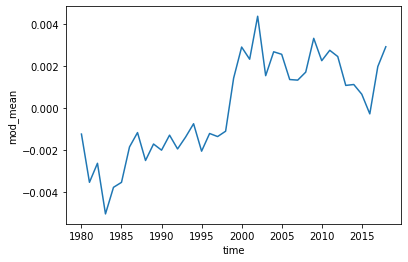

In [44]:
(talkos_atl_ICE.mod_mean - talkos_atl_ICE.mod_mean.mean('time')).plot()

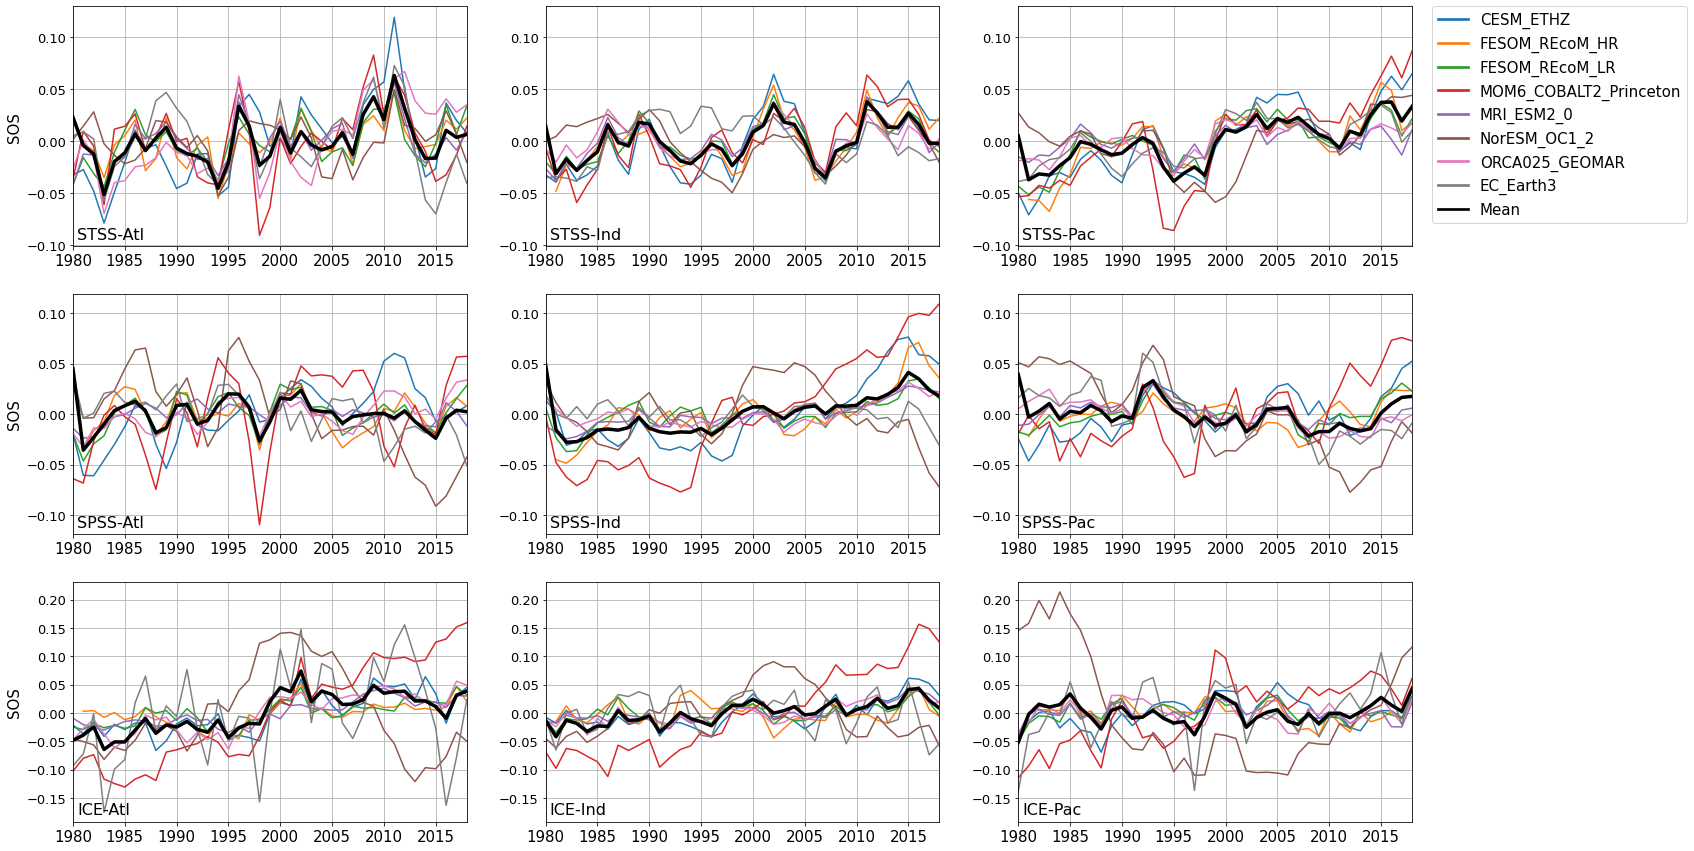

In [49]:
plot_timeseries_anomalies('sos')